## Name : Syanthana Grandhi

### Beginner's Task :
Stock Prediction and Forecasting Using Stacked LSTM

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

## Importing dataset

In [54]:
df=pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [55]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [57]:
df.shape

(2035, 8)

In [58]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [59]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [60]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [9]:
df1=df.reset_index()['Turnover (Lacs)']

In [10]:
df1

0        7162.35
1       11859.95
2        5248.60
3        5503.90
4        7999.55
          ...   
2030      694.98
2031      780.01
2032      340.31
2033      355.17
2034      803.56
Name: Turnover (Lacs), Length: 2035, dtype: float64

In [11]:
df1.shape

(2035,)

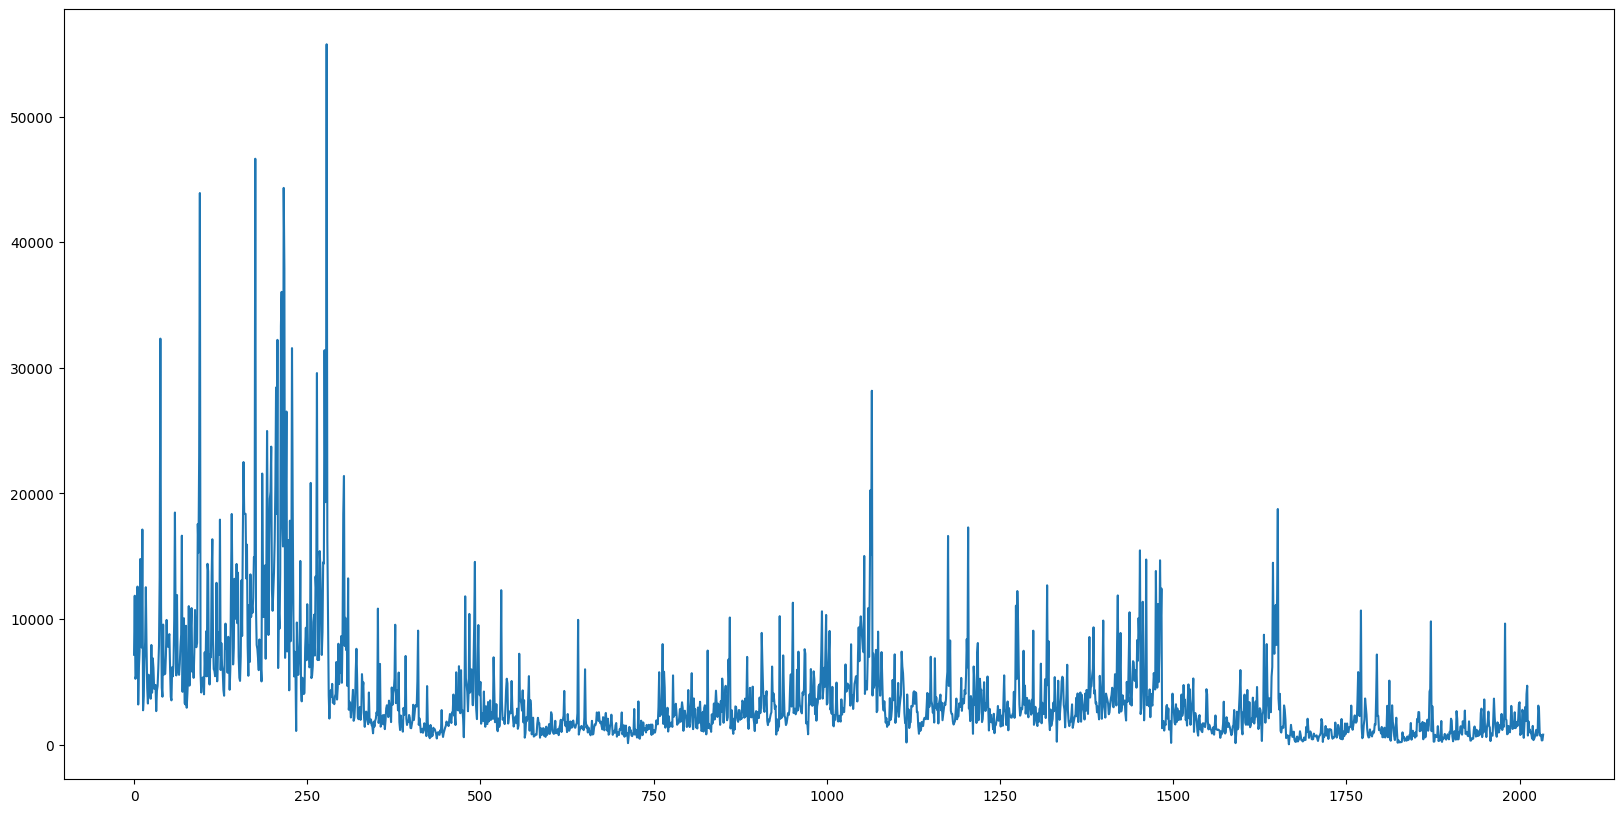

In [12]:
plt.figure(figsize=(20,10))
plt.plot(df1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
df1.shape

(2035, 1)

In [15]:
df1

array([[0.12788156],
       [0.21219178],
       [0.09353452],
       ...,
       [0.00544294],
       [0.00570964],
       [0.01375712]])

In [16]:
training_size=int(len(df1)*0.65)

In [17]:
training_size

1322

In [18]:
test_size=len(df1)-training_size

In [19]:
test_size

713

In [61]:
train_data,test_data=df1[0:training_size,:],df1[training_size:,:]

In [62]:
train_data

array([[0.12788156],
       [0.21219178],
       [0.09353452],
       ...,
       [0.08436962],
       [0.14742281],
       [0.03451647]])

In [63]:
test_data

array([[0.02023761],
       [0.04964783],
       [0.02641478],
       [0.03155926],
       [0.03600234],
       [0.05942474],
       [0.04719154],
       [0.095914  ],
       [0.05333766],
       [0.05120999],
       [0.00366273],
       [0.04540343],
       [0.09079519],
       [0.04583255],
       [0.0349639 ],
       [0.04946118],
       [0.06568501],
       [0.09006275],
       [0.09653929],
       [0.09308206],
       [0.05614268],
       [0.04956115],
       [0.02418911],
       [0.05041491],
       [0.07186918],
       [0.11361545],
       [0.04857744],
       [0.03241625],
       [0.02596717],
       [0.03227931],
       [0.03195554],
       [0.04123189],
       [0.05701959],
       [0.02351734],
       [0.02938671],
       [0.03550448],
       [0.03992118],
       [0.04242055],
       [0.06631838],
       [0.03988995],
       [0.07261077],
       [0.03174896],
       [0.06290368],
       [0.06034401],
       [0.07395558],
       [0.03225616],
       [0.07064785],
       [0.061

In [64]:
def create_dataset(dataset,time_step=1):
    x,y=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        x.append(a)
        y.append(dataset[i+time_step,0])
    return np.array(x),np.array(y)

In [65]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [66]:
print(x_train)

[[0.12788156 0.21219178 0.09353452 ... 0.07394607 0.09465444 0.08905249]
 [0.21219178 0.09353452 0.09811652 ... 0.09465444 0.08905249 0.09602671]
 [0.09353452 0.09811652 0.14290722 ... 0.08905249 0.09602671 0.07137832]
 ...
 [0.14465207 0.0343431  0.04570584 ... 0.09286615 0.03750419 0.10034901]
 [0.0343431  0.04570584 0.09361151 ... 0.03750419 0.10034901 0.22708193]
 [0.04570584 0.09361151 0.0740595  ... 0.10034901 0.22708193 0.08436962]]


In [29]:
x_train.shape

(1221, 100)

In [30]:
x_test.shape

(612, 100)

In [31]:
y_train.shape

(1221,)

In [32]:
y_test.shape

(612,)

In [33]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [34]:
x_train

array([[[0.12788156],
        [0.21219178],
        [0.09353452],
        ...,
        [0.07394607],
        [0.09465444],
        [0.08905249]],

       [[0.21219178],
        [0.09353452],
        [0.09811652],
        ...,
        [0.09465444],
        [0.08905249],
        [0.09602671]],

       [[0.09353452],
        [0.09811652],
        [0.14290722],
        ...,
        [0.08905249],
        [0.09602671],
        [0.07137832]],

       ...,

       [[0.14465207],
        [0.0343431 ],
        [0.04570584],
        ...,
        [0.09286615],
        [0.03750419],
        [0.10034901]],

       [[0.0343431 ],
        [0.04570584],
        [0.09361151],
        ...,
        [0.03750419],
        [0.10034901],
        [0.22708193]],

       [[0.04570584],
        [0.09361151],
        [0.0740595 ],
        ...,
        [0.10034901],
        [0.22708193],
        [0.08436962]]])

## creating LSTM Model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [36]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean _squared_error',optimizer='adam')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


## Training The Model

In [69]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100


ValueError: in user code:

    File "C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 240, in __call__
        self.build(y_pred)
    File "C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 182, in build
        self._losses = tf.nest.map_structure(
    File "C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 353, in _get_loss_object
        loss = losses_mod.get(loss)
    File "C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 2649, in get
        return deserialize(identifier)
    File "C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 2603, in deserialize
        return deserialize_keras_object(
    File "C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\generic_utils.py", line 769, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: mean _squared_error. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


## Making Predictions

In [39]:
import tensorflow as tf

In [40]:
train_pred=model.predict(x_train)
test_pred=model.predict(x_test)

20/20 [==============================] - 0s 21ms/step


In [41]:
train_pred=scaler.inverse_transform(train_pred)
test_pred=scaler.inverse_transform(test_pred)

In [42]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_pred))

69.14979164974946

In [43]:
math.sqrt(mean_squared_error(y_test,test_pred))

25.989041642817273

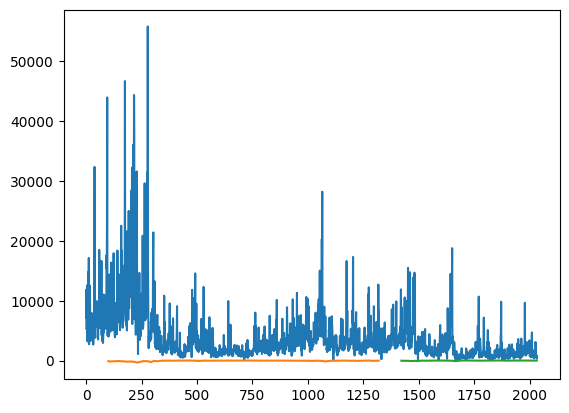

In [44]:
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_pred)+look_back,:]=train_pred


testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_pred)+(look_back*2)+1:len(df1)- 1,:]=test_pred


plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [45]:
len(test_data),x_test.shape

(713, (612, 100, 1))

In [46]:
x_input=test_data[207:].reshape(1,-1)
x_input.shape

(1, 506)

In [47]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [48]:
lst_output=[]
n_steps=505
nextNumberOfDays=30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {} ".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

0 day input [0.01769463 0.0425067  0.04461822 0.04017927 0.03182004 0.01793836
 0.01238845 0.0367355  0.04162943 0.02128646 0.02868891 0.01874294
 0.01736368 0.03018538 0.02653306 0.02948327 0.02455076 0.03199718
 0.07869749 0.07127709 0.03269839 0.02129005 0.0280385  0.02504952
 0.0218816  0.01987058 0.01535158 0.01759663 0.02437541 0.01375102
 0.02650309 0.04115023 0.02174753 0.02090992 0.02044365 0.02102676
 0.0203864  0.01915968 0.00923022 0.01832153 0.0143108  0.01858321
 0.02960639 0.06082429 0.01661455 0.01540363 0.01728112 0.0386173
 0.03329281 0.0247629  0.03035731 0.02661131 0.0233323  0.01838758
 0.01301805 0.01594959 0.02554828 0.02776157 0.04895506 0.02078698
 0.00165207 0.01544742 0.04653394 0.02132415 0.02362951 0.05231824
 0.07397802 0.1059996  0.0526666  0.02200149 0.01415664 0.04604146
 0.04689917 0.07094435 0.03079775 0.02783766 0.02981727 0.07759318
 0.02777323 0.03132989 0.06019882 0.02436715 0.02751568 0.03658366
 0.03202015 0.06661164 0.03560516 0.02966436 0.0381

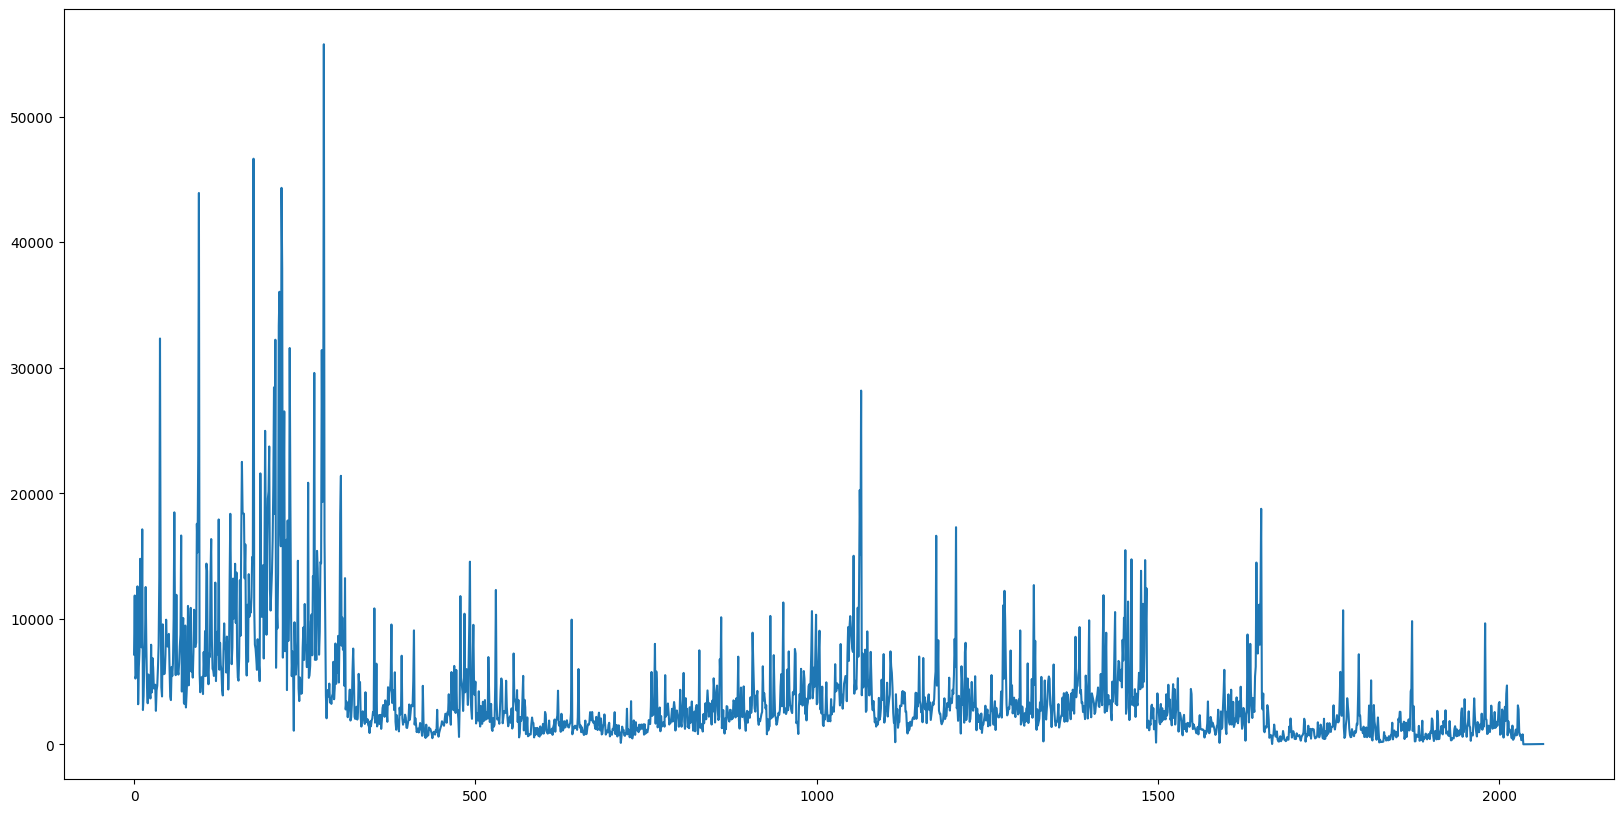

In [49]:
plt.figure(figsize=(20,10))
df=df1.tolist()
df.extend(lst_output)
df=scaler.inverse_transform(df).tolist()
plt.plot(df)